<img src="./images/DLI_Header.png" style="width: 400px;">

# Image Classification with the MNIST Dataset

In this section we will do the "Hello World" of deep learning: training a deep learning model to correctly classify hand-written digits.

## Objectives

* Understand how deep learning can solve problems traditional programming methods cannot
* Learn about the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* Use the [Keras API](https://keras.io/) to load the MNIST dataset and prepare it for training
* Create a simple neural network to perform image classification
* Train the neural network using the prepped MNIST dataset
* Observe the performance of the trained neural network

## The Problem: Image Classification

In traditional programming, the programmer is able to articulate rules and conditions in their code that their program can then use to act in the correct way. This approach continues to work exceptionally well for a huge variety of problems.

Image classification, which asks a program to correctly classify an image it has never seen before into its correct class, is near impossible to solve with traditional programming techniques. How could a programmer possibly define the rules and conditions to correctly classify a huge variety of images, especially taking into account images that they have never seen?

## The Solution: Deep Learning

Deep learning excels at pattern recognition by trial and error. By training a deep neural network with sufficient data, and providing the network with feedback on its performance via training, the network can identify, though a huge amount of iteration, its own set of conditions by which it can act in the correct way.

## The MNIST Dataset

In the history of deep learning, the accurate image classification of the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a collection of 70,000 grayscale images of handwritten digits from 0 to 9, was a major development. While today the problem is considered trivial, doing image classification with MNIST has become a kind of "Hello World" for deep learning.

Here are 40 of the images included in the MNIST dataset:

<img src="./images/mnist1.png" style="width: 600px;">

## Training and Validation Data and Labels

When working with images for deep learning, we need both the images themselves, usually denoted as `X`, and also, correct [labels](https://developers.google.com/machine-learning/glossary#label) for these images, usually denoted as `Y`. Furthermore, we need `X` and `Y` values both for *training* the model, and then, a separate set of `X` and `Y` values for *validating* the performance of the model after it has been trained. Therefore, we need 4 segments of data for the MNIST dataset:

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained

The process of preparing data for analysis is called [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). To learn more about the differences between training data and validation data (as well as test data), check out [this article](https://machinelearningmastery.com/difference-test-validation-datasets/) by Jason Brownlee.

## Loading the Data Into Memory (with Keras)

There are many [deep learning frameworks](https://developer.nvidia.com/deep-learning-frameworks), each with their own merits. In this workshop we will be working with [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner), and specifically with the [Keras API](https://keras.io/). Keras has many useful built in functions designed for the computer vision tasks. It is also a legitimate choice for deep learning in a professional setting due to its [readability](https://blog.pragmaticengineer.com/readable-code/) and efficiency, though it is not alone in this regard, and it is worth investigating a variety of frameworks when beginning a deep learning project.

One of the many helpful features that Keras provides are modules containing many helper methods for [many common datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), including MNIST.

We will begin by loading the Keras dataset module for MNIST:

In [2]:
from tensorflow.keras.datasets import mnist

With the `mnist` module, we can easily load the MNIST data, already partitioned into images and labels for both training and validation:

In [3]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## Exploring the MNIST Data

We stated above that the MNIST dataset contained 70,000 grayscale images of handwritten digits. By executing the following cells, we can see that Keras has partitioned 60,000 of these images for training, and 10,000 for validation (after training), and also, that each image itself is a 2D array with the dimensions 28x28:

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_valid.shape

(10000, 28, 28)

Furthermore, we can see that these 28x28 images are represented as a collection of unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between:

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train.min()

0

In [8]:
x_train.max()

255

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Using [Matplotlib](https://matplotlib.org/), we can render one of these grayscale images in our dataset:

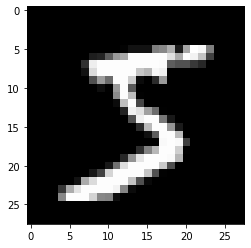

In [10]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

In this way we can now see that this is a 28x28 pixel image of a 5. Or is it a 3? The answer is in the `y_train` data, which contains correct labels for the data. Let's take a look:

In [11]:
y_train[0]

5

## Preparing the Data for Training

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Flattening the Image Data

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), we're going to simplify things to start and [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.

Here we accomplish this using the helper method `reshape`:

In [12]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

We can confirm that the image data has been reshaped and is now a collection of 1D arrays containing 784 pixel values each:

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1 (more on this topic later). Converting integer values to floating point values between 0 and 1 is called [normalization](https://developers.google.com/machine-learning/glossary#normalization), and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [15]:
x_train = x_train / 255
x_valid = x_valid / 255 

We can now see that the values are all floating point values between `0.0` and `1.0`:

In [16]:
x_train.dtype

dtype('float64')

In [17]:
x_train.min()

0.0

In [18]:
x_train.max()

1.0

### Categorical Encoding

Consider for a moment, if we were to ask, what is 7 - 2? Stating that the answer was 4 is closer than stating that the answer was 9. However, for this image classification problem, we don't want the neural network to learn this kind of reasoning: we just want it to select the correct category, and understand that if we have an image of the number 5, that guessing 4 is just as bad as guessing 9.

As it stands, the labels for the images are integers between 0 and 9. Because these values represent a numerical range, the model might try to draw some conclusions about its performance based on how close to the correct numerical category it guesses.

Therefore, we will do something to our data called categorical encoding. This kind of transformation modifies the data so that each value is a collection of all possible categories, with the actual category that this particular value is set as true.

As a simple example, consider if we had 3 categories: red, blue, and green. For a given color, 2 of these categories would be false, and the other would be true:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

Rather than use "True" or "False", we could represent the same using binary, either 0 or 1:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

This is what categorical encoding is, transforming values which are intended to be understood as categorical labels into a representation that makes their categorical nature explicit to the model. Thus, if we were using these values for training, we would convert...

```python
values = ['red, green, blue, green']
```

... which a neural network would have a very difficult time making sense of, instead to:

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### Categorically Encoding the Labels

Keras provides a utility to [categorically encode values](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical), and here we use it to perform categorical encoding for both the training and validation labels:

In [19]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Here are the first 10 values of the training labels, which you can see have now been categorically encoded:

In [20]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model

With the data prepared for training, it is now time to create the model that we will train with the data. This first basic model will be made up of several *layers* and will be comprised of 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several [hidden layers](https://developers.google.com/machine-learning/glossary#hidden-layer), each comprised of many *neurons*. Each [neuron](https://developers.google.com/machine-learning/glossary#neuron) will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instantiating the Model

To begin, we will use Keras's [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [21]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) layer class.

In [22]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. We are going to use `512` which we have chosen from experimentation. Choosing the correct number of neurons is what puts the "science" in "data science" as it is a matter of capturing the statistical complexity of the dataset. Try playing around with this value later to see how it affects training and to start developing a sense for what this number means.

We will learn more about activation functions later, but for now, we will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [23]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. Again, much more will be said about these later, but for now know that these layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [24]:
model.add(Dense(units = 512, activation='relu'))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [25]:
model.add(Dense(units = 10, activation='softmax'))

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Note the number of trainable parameters. Each of these can be adjusted during training and will contribute towards the trained model's guesses.

### Compiling the Model

Again, more details are to follow, but the final step we need to do before we can actually train our model with data is to [compile](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) it. Here we specify a [loss function](https://developers.google.com/machine-learning/glossary#loss) which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [27]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

"Training a model with data" is often also called "fitting a model to data." Put this latter way, it highlights that the shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

Run the cell below to train the model. We will discuss its output after the training completes:

In [28]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - accuracy: 0.9444 - val_loss: 0.1150 - val_accuracy: 0.9653
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9750 - val_loss: 0.1308 - val_accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0806 - accuracy: 0.9808 - val_loss: 0.1596 - val_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9831 - val_loss: 0.1417 - val_accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0668 - accuracy: 0.9850 - val_loss: 0.1474 - val_accuracy: 0.9759


### Observing Accuracy

For each of the 5 epochs, notice the `accuracy` and `val_accuracy` scores. `accuracy` states how well the model did for the epoch on all the training data. `val_accuracy` states how well the model did on the validation data, which if you recall, was not used at all for training the model.

The model did quite well! The accuracy quickly reached close to 100%, as did the validation accuracy. We now have a model that can be used to accurately detect and classify hand-written images.

The next step would be to use this model to classify new not-yet-seen handwritten images. This is called [inference](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). We'll explore the process of inference in a later exercise. 

## Summary

It's worth taking a moment to appreciate what we've done here. Historically, the expert systems that were built to do this kind of task were extremely complicated, and people spent their careers building them (check out the references on the [official MNIST page](http://yann.lecun.com/exdb/mnist/) and the years milestones were reached).

MNIST is not only useful for its historical influence on Computer Vision, but it's also a great [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) and debugging tool. Having trouble getting a fancy new machine learning architecture working? Check it against MNIST. If it can't learn on this dataset, chances are it won't learn on more complicated images and datasets.

## Clear the Memory

Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [29]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

In this section you learned how to build and train a simple neural network for image classification. In the next section, you will be asked to build your own neural network and perform data preparation to solve a different image classification problem.

## ☆ Bonus Exercise ☆

Have time to spare? In the next section, we will talk about how we arrived at some of the numbers above, but we can try imagining what it was like to be a researcher developing the techniques commonly used today.

Ultimately, each neuron is trying to fit a line to some data. Below, we have some datapoints and a randomly drawn line using the equation [y = mx + b](https://www.mathsisfun.com/equation_of_line.html).

Try changing the `m` and the `b` in order to find the lowest possible loss. How did you find the best line? Can you make a program to follow your strategy?

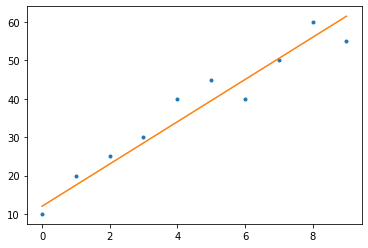

Loss: 16.625


In [14]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = 5.5  # -2 to start, change me please
b = 12  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

Have an idea? Excellent! Please shut down the kernel before moving on.

In [30]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}